In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#Avoiding the clutter
warnings.filterwarnings('ignore')
#Magic command, just display plots directly below the code cells
%matplotlib inline

In [7]:
data = pd.read_csv(r"C:\Users\45235\Downloads\player_injuries_impact.csv")
data.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match results before injury,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match 1,...,NaN,NaN,Match 2,NaN,NaN,NaN,Match 3,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Result,...,GD,Player rating,Result,Opposition,GD,Player rating,Result,Opposition,GD,Player rating
2,Jamaal Lascelles,Newcastle,Center Back,26.0,2019/20,77.0,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1,7.1,draw,Everton,0,6.2,draw,Norwich City,0,6.7
3,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
4,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0,6(S),lose,Arsenal,-4,N.A.,lose,Crystal Palace,-1,6.5


## Data cleaning and Preprocessing

In [10]:
#Drop unnamed columns
data = data.loc[:,~data.columns.str.contains('^Unnamed')]
#Convert data columns to datetime
data['Date of Injury'] = pd.to_datetime(data['Date of Injury'], errors='coerce')
data['Date of return'] = pd.to_datetime(data['Date of return'], errors='coerce')

In [11]:
#Checking for missing values
data.isnull().sum()

Name                            2
Team Name                       2
Position                        2
Age                             2
Season                          2
FIFA rating                     2
Injury                          2
Date of Injury                 85
Date of return                 90
Match results before injury     0
Missed match results            0
Match results after injury      0
dtype: int64

### Exploratory Data Analysis

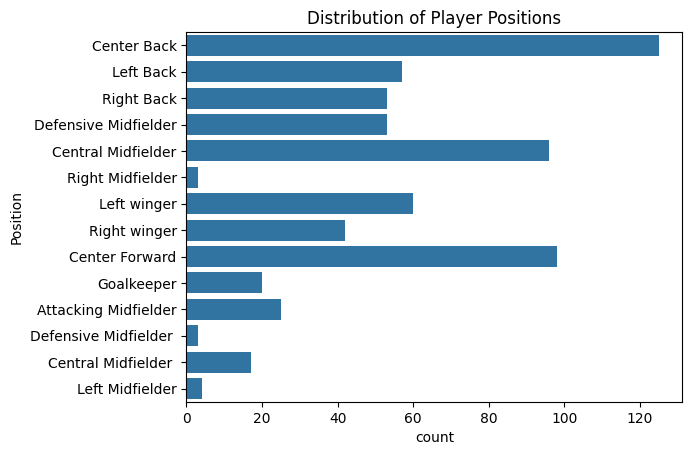

In [16]:
sns.countplot(y='Position', data=data)
plt.title('Distribution of Player Positions')
plt.show()

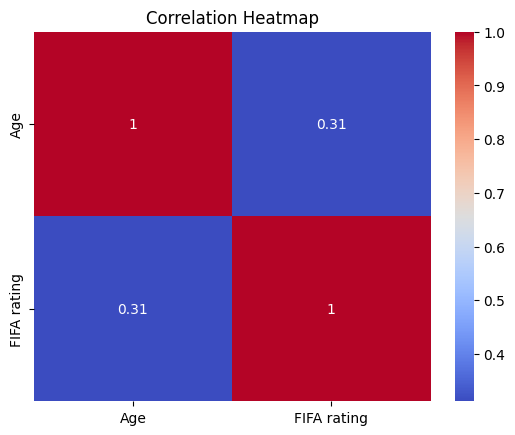

In [18]:
# Correlation heatmap for numeric columns
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Predictive Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the data for modeling
features = ['Age', 'FIFA rating']
X = data[features].fillna(0)
y = data['Match results after injury'].apply(lambda x: 1 if x == 'Win' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(1.0, array([[132]]))